In [ ]:
# pyplot_customtime.jl
#
#	Demonstrate reformatting of time axis
#
# gizmaa (https://gist.github.com/gizmaa/7214002)
# Julia 0.5.0
# 27.11.14
# Last Edit: 20.10.16

using PyPlot

# Create Data
dt = Dates.Millisecond(100)
time = [DateTime(2014,11,20):dt:DateTime(2014,11,22);]
y = fill!(Array(Float64,length(time)),42)
#y = floor(100*rand(length(time))) # Fails unless the time span is very short

font1 = Dict("fontname"=>"Sans","style"=>"normal")
time2 = map(Float64,time)/1000/60/60/24 # Convert time from milliseconds from day 0 to days from day 0
timespan = "\n" * Dates.format(minimum(time),"yyyy-mm-dd HH:MM:SS") * " - " * Dates.format(maximum(time),"yyyy-mm-dd HH:MM:SS")

majorformatter = matplotlib[:dates][:DateFormatter]("%d.%m.%Y")
minorformatter = matplotlib[:dates][:DateFormatter]("%H:%M")
majorlocator = matplotlib[:dates][:DayLocator](interval=1)
minorlocator = matplotlib[:dates][:HourLocator](byhour=(8, 16))

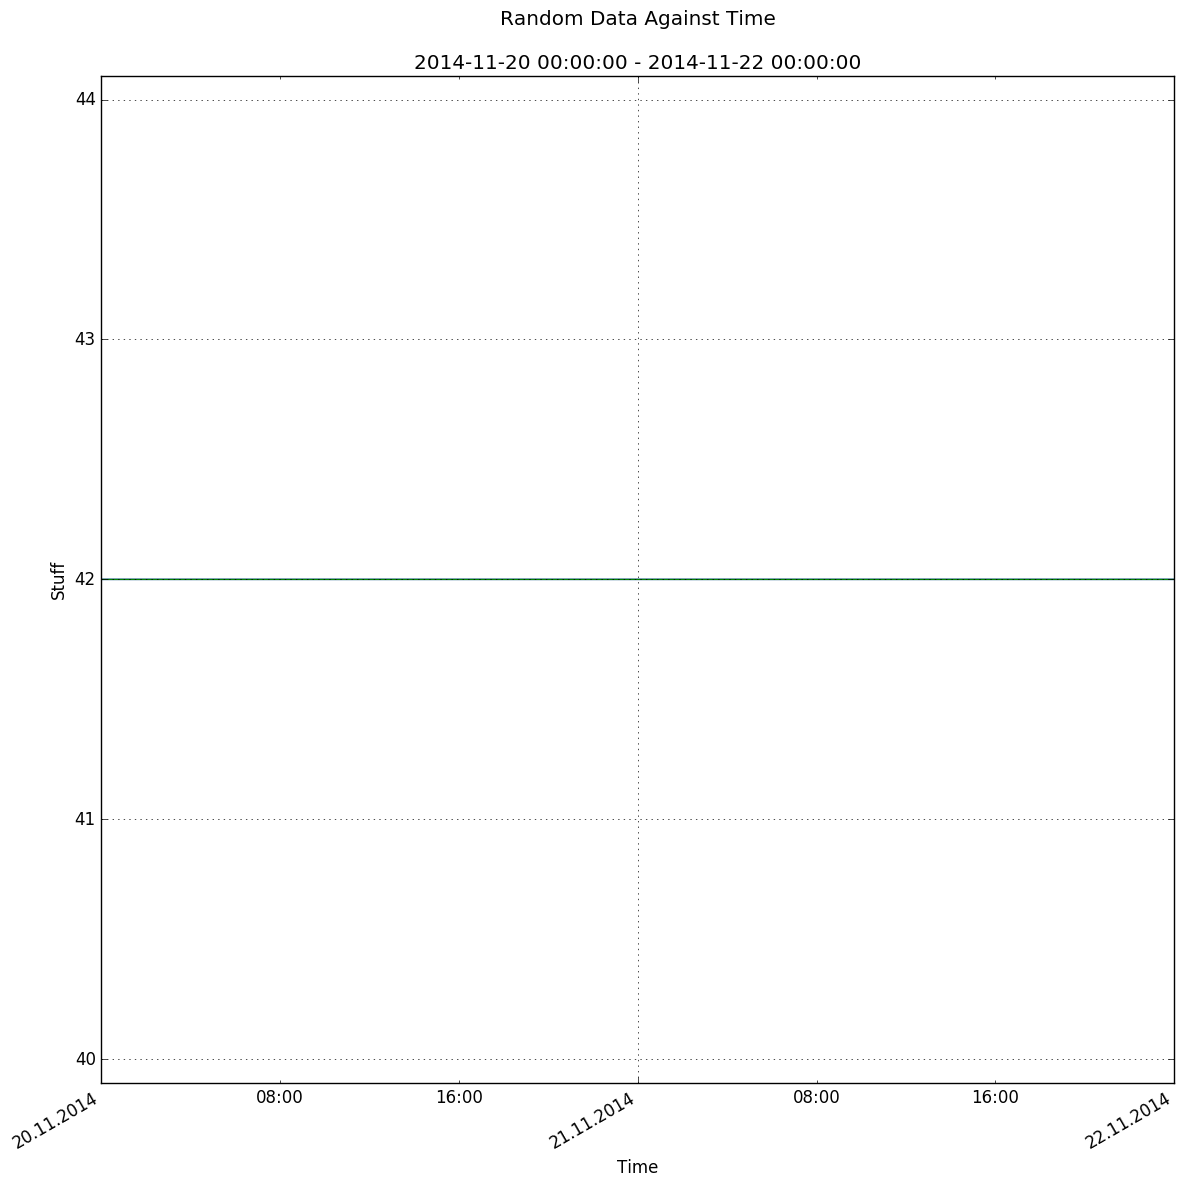

In [3]:
# Plot
fig = figure("pyplot_customtime",figsize=(10,10)) # Create a figure and save the handle
ax1 = axes()
p1 = plot_date(time2,y,linestyle="-",marker="None",label="test")
axis("tight")
title("Random Data Against Time\n" * timespan)
grid("on")
xlabel("Time")
ylabel("Stuff",fontdict=font1)
ax1[:xaxis][:set_major_formatter](majorformatter)
ax1[:xaxis][:set_minor_formatter](minorformatter)
ax1[:xaxis][:set_major_locator](majorlocator)
ax1[:xaxis][:set_minor_locator](minorlocator)
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
fig[:canvas][:draw]() # Update the figure
PyPlot.tight_layout()
gcf() # Needed for IJulia to plot inline